# IF3270 Machine Learning | Praktikum

This notebook serves as a template for the assignment. Please create a copy of this notebook to complete your work. You can add more code blocks, markdown blocks, or new sections if needed.

Group Number: 46

Group Members:
- Kharris Khisunica (13522051)
- Fabian Radenta Bangun (13522105)

## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
from pathlib import Path



# Import other libraries if needed

## Import Dataset

In [3]:
# Write your code here
train_csv_dir = "./train.csv"
test_csv_dir = "./test.csv"
train_img_dir = "./praktikum-2-if-3270-ml/images/images/train"
test_img_dir =  "./praktikum-2-if-3270-ml/images/images/test"

df_train = pd.read_csv(train_csv_dir)
df_test = pd.read_csv(test_csv_dir)



## Constant

In [4]:
IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224
IMAGE_SIZE = (IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS = 3

# 1. Exploratory Data Analysis

Exploratory Data Analysis (EDA) is a crucial step in the data analysis process that involves examining and visualizing data sets to uncover patterns, trends, anomalies, and insights. It is the first step before applying more advanced statistical and machine learning techniques. EDA helps you to gain a deep understanding of the data you are working with, allowing you to make informed decisions and formulate hypotheses for further analysis. Provide at least 3 analysis

In [5]:
df_train.head()

,Image,Species_Label
0,eceecd68-aae4-41b5-86fe-5a0b954b038e.jpg,0
1,224f5a7b-e6ad-479d-a6ae-a26812e4e038.jpg,0
2,461e8e5f-8221-441c-971a-aecfcaf05564.jpg,0
3,a62fab23-6107-46e5-aae0-7ff9bc0a2363.jpg,1
4,7e27f920-cecd-4d86-9e2a-9a667b14d787.jpg,1


### Data Size

In [6]:
df_train.shape

(12500, 2)

### Data Types

In [7]:
df_train.dtypes

Image            object
Species_Label     int64
dtype: object

### Unique values for Categorical

In [8]:
df_train.nunique()

Image            12500
Species_Label        2
dtype: int64

### Missing Values

In [9]:
df_train.isnull().sum()

Image            0
Species_Label    0
dtype: int64

### Distribution of Category

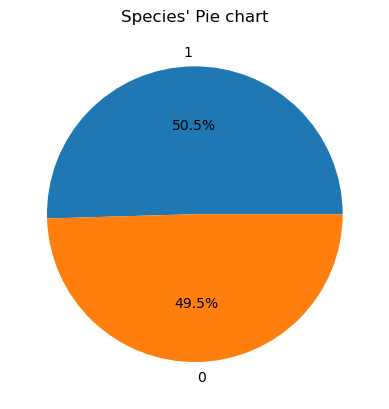

In [10]:
# Histogram for Numerical


value_counts = df_train["Species_Label"].value_counts()
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%')
plt.title(f"Species' Pie chart")
plt.show()

### Check NULL

In [11]:
df_train.isnull().any()

Image            False
Species_Label    False
dtype: bool

### Image Properties

              width        height
count  12500.000000  12500.000000
mean     404.158720    361.163920
std      109.238873     96.638059
min       42.000000     33.000000
25%      324.000000    306.750000
50%      447.000000    374.000000
75%      499.000000    422.000000
max     1050.000000    702.000000
RGB    12500
Name: mode, dtype: int64


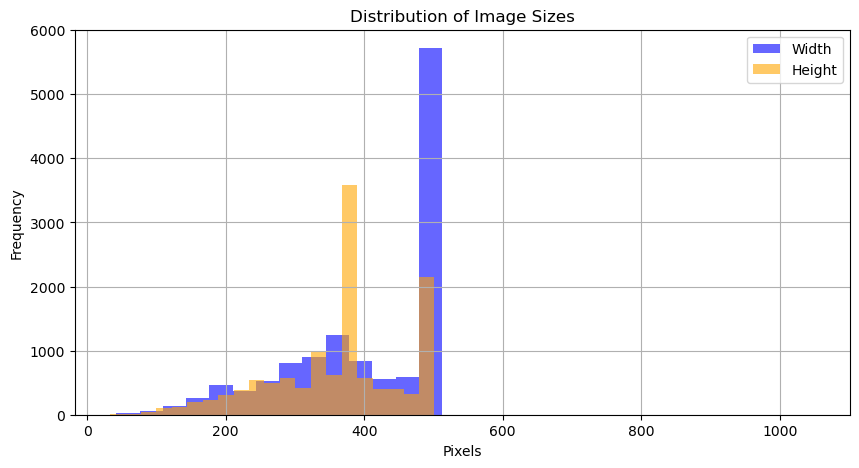

In [16]:
sample_df = df_train

image_shapes = []
for image in sample_df['Image']:
    path = train_img_dir + f"/{image}"
    with Image.open(path) as img:
        image_shapes.append(img.size + (img.mode,))

shape_df = pd.DataFrame(image_shapes, columns=['width', 'height', 'mode'])

# Summary of dimensions
print(shape_df[['width', 'height']].describe())

# Color mode check
print(shape_df['mode'].value_counts())

plt.figure(figsize=(10, 5))
plt.hist(shape_df['width'], bins=30, alpha=0.6, color='blue', label='Width')
plt.hist(shape_df['height'], bins=30, alpha=0.6, color='orange', label='Height')
plt.xlabel('Pixels')
plt.ylabel('Frequency')
plt.title("Distribution of Image Sizes")
plt.legend()
plt.grid(True)
plt.show()


### QUESTION

1. What is the largest and smallest image size for each category ?

Smallest image per category:
   label  width  height
0      0     59      36
1      1     50      38
Largest image per category:
   label  width  height
0      0    500     499
1      1   1050     702


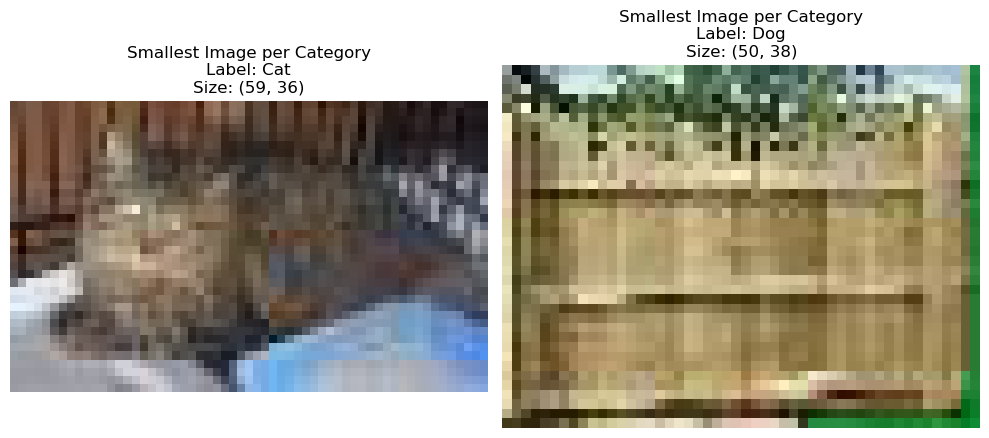

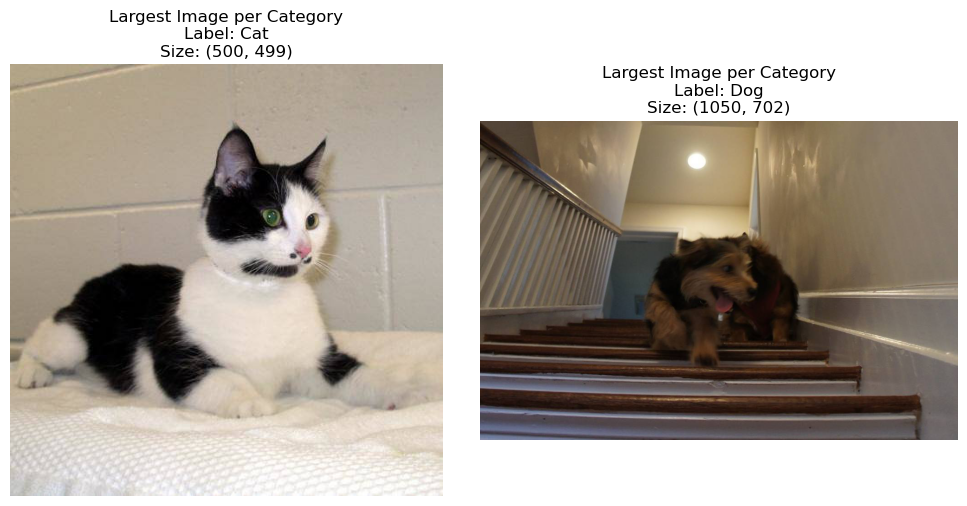

In [18]:
sample_df = df_train

shape_df['pixels'] = shape_df['width'] * shape_df['height']
shape_df['file'] = df_train['Image'].values
shape_df['label'] = df_train['Species_Label'].values  

grouped = shape_df.groupby('label')

smallest = grouped.apply(lambda x: x.drop(columns='label').nsmallest(1, 'pixels')).reset_index(drop=True)
largest = grouped.apply(lambda x: x.drop(columns='label').nlargest(1, 'pixels')).reset_index(drop=True)

smallest['label'] = grouped['label'].first().values
largest['label'] = grouped['label'].first().values

print("Smallest image per category:")
print(smallest[['label', 'width', 'height']])

print("Largest image per category:")
print(largest[['label', 'width', 'height']])

def show_images(df, title):
    plt.figure(figsize=(10, 5))
    for i, row in enumerate(df.itertuples()):
        path = train_img_dir + f"/{row.file}"
        img = Image.open(path)
        plt.subplot(1, 2, i + 1)
        plt.imshow(img)
        label_str = "Cat" if row.label == 0 else "Dog"
        plt.title(f"{title}\nLabel: {label_str}\nSize: {img.size}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# 5. Display smallest and largest images
show_images(smallest, "Smallest Image per Category")
show_images(largest, "Largest Image per Category")


2. What is the distribution of Height and Width of the image in this dataset

Image Size Summary:
             width      height
count  1250.000000  1250.00000
mean    404.184800   358.28320
std     110.254275    93.04556
min      59.000000    49.00000
25%     325.000000   308.50000
50%     449.000000   374.00000
75%     499.000000   406.00000
max     500.000000   500.00000


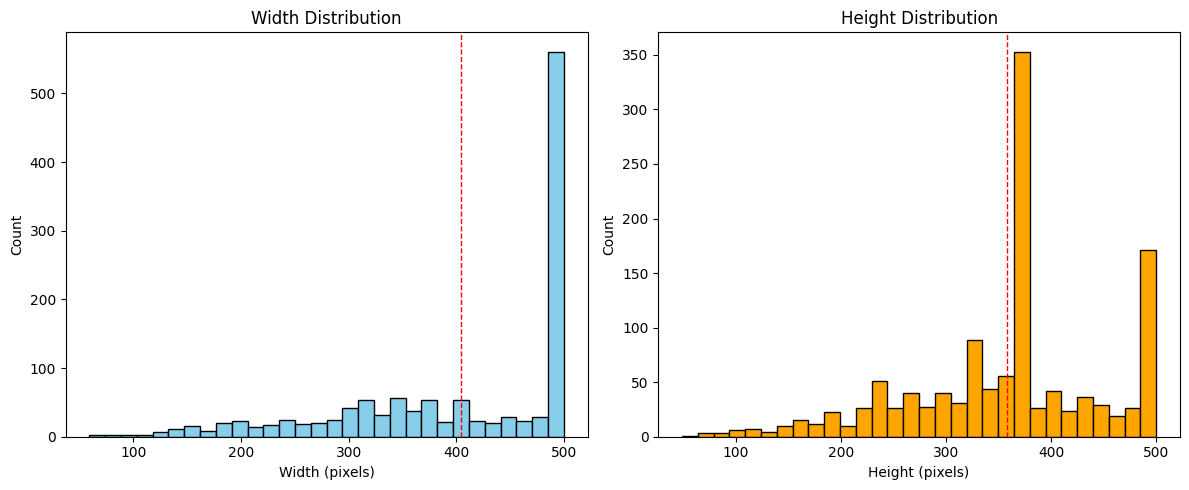

In [ ]:
print("Image Size Summary:")
print(shape_df[['width', 'height']].describe())

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(shape_df['width'], bins=30, color='skyblue', edgecolor='black')
plt.axvline(shape_df['width'].mean(), color='red', linestyle='dashed', linewidth=1)
plt.title('Width Distribution')
plt.xlabel('Width (pixels)')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
plt.hist(shape_df['height'], bins=30, color='orange', edgecolor='black')
plt.axvline(shape_df['height'].mean(), color='red', linestyle='dashed', linewidth=1)
plt.title('Height Distribution')
plt.xlabel('Height (pixels)')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# 2. Split Training Set and Validation Set

Splitting the training and validation set works as an early diagnostic towards the performance of the model we train. This is done before the preprocessing steps to **avoid data leakage inbetween the sets**. If you want to use k-fold cross-validation, split the data later and do the cleaning and preprocessing separately for each split.

Note: For training, you should use the data contained in the `Train_processed.csv` given by the TA. The `test_processed_no_solution.csv` data is only used for kaggle submission.

In [ ]:
# Split training set and validation set here, store into variables train_set and val_set.
# Remember to also keep the original training set before splitting. This will come important later.
# train_set, val_set = ...

from sklearn.model_selection import train_test_split

# Split the data: 80% train, 20% validation
df_train_split, df_val_split = train_test_split(
    df_train,
    test_size=0.2,
    stratify=df_train["Species_Label"],
    random_state=42
)


# 3. Data Cleaning and Preprocessing

This step is the first thing to be done once a Data Scientist have grasped a general knowledge of the data. Raw data is **seldom ready for training**, therefore steps need to be taken to clean and format the data for the Machine Learning model to interpret.

By performing data cleaning and preprocessing, you ensure that your dataset is ready for model training, leading to more accurate and reliable machine learning results. These steps are essential for transforming raw data into a format that machine learning algorithms can effectively learn from and make predictions.

For each step that you will do, **please explain the reason why did you do that process. Write it in a markdown cell under the code cell you wrote.**

1. Image Resizing

We will resize our image to fixed dimension of 224 x 224 since it's the standard minimum size for CNN training. Some CNN models also require consistent input shape. 

2. Augmentation

We use RandomHorizontalFlip and RandomRotation on the image to help generalization of the image by mimicking real world variation and prevent the model from overfitting to specific. 

3. Normalize

Since the images that we are using are considered to be "natural scenes" and doesn't have any meaningful alteration to the images, we are using the mean and standard deviation used by ImageNet. This will help to normalize the RGB channels for faster convergences. 

4. Convert to Tensor

Neural network require numeric tensors as input so it's necessary to transform the image into transform first before we can process and use the image for modelling. 

In [ ]:
from torchvision import transforms

# For training set
train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),             # Resize
    transforms.RandomHorizontalFlip(),         # Augmentation
    transforms.RandomRotation(10),             # Augmentation
    transforms.ToTensor(),                     # Convert to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406],  
                         std=[0.229, 0.224, 0.225])
])

# For validation and test set (no augmentation)
val_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])


In [ ]:
import os
from PIL import Image
from torch.utils.data import Dataset

class PetDataset(Dataset):
    def __init__(self, dataframe, image_dir, transform=None):
        self.dataframe = dataframe.reset_index(drop=True)
        self.image_dir = image_dir
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        img_name = self.dataframe.loc[idx, 'Image']
        label = self.dataframe.loc[idx, 'Species_Label']
        img_path = os.path.join(self.image_dir, img_name)
        
        image = Image.open(img_path).convert("RGB")

        if self.transform:
            image = self.transform(image)

        return image, label


In [ ]:
# Paths
train_image_dir = "./praktikum-2-if3270/images/train"

# Create dataset instances
train_dataset = PetDataset(df_train_split, train_image_dir, transform=train_transforms)
val_dataset = PetDataset(df_val_split, train_image_dir, transform=val_transforms)


In [ ]:
from torch.utils.data import DataLoader

# Hyperparameters
batch_size = 32
num_workers = 2  

# Loaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=num_workers)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers)


# 4. Modeling and Validation

Modeling is the process of building a machine learning model to solve a particular problem, or in the context of this task, predicting each class in an image using a `Convolutional Neural Network with AlexNet Architecture`. Validation is the process of evaluating your trained model using the validation set or cross-validation method and providing some metrics that can help you decide what to do in the next iteration of development.

### 4.1.1 Build Your Own Model

Convolutional Neural Network (CNN) is a type of artificial neural network specifically designed to process data that has a grid-like structure, such as images or digital pictures. AlexNet is one of the well-known CNN architectures due to its success in winning the ImageNet competition in 2012. AlexNet consists of several convolutional layers accompanied by pooling layers and fully connected layers, and it uses the ReLU activation function. Try to create your own CNN model with AlexNet architecture using PyTorch/Tensorflow.

### 4.1.2 Pretrained Model Fine-tuning

Aside from building your own CNN model, you can also fine-tune a pretrained model from platforms like Hugging Face or Roboflow. As a reference, you may use `ResNet50`, one of the most widely used pretrained CNN architectures.

## 4.2 Validation

Validation is the process of evaluating a trained model using a validation set or cross-validation method. It provides metrics that help determine the necessary steps for the next iteration of model development.  

For validation, the metric used is **macro f1-score**. A higher f1-score indicates better model calibration.  

### Required Validation Results  
The validation results that must be included in the notebook are:  
1. The validation results from the required baseline models.  
2. The validation results from the final submission model on **Kaggle**.  

In [ ]:
# Type your code here

rf_model.fit(X_train_processed, y_train)

y_val_pred = rf_model.predict(X_val_processed)

macro_f1 = f1_score(y_val, y_val_pred, average="macro")
print(f"Macro F1 Score on Validation Set: {macro_f1:.4f}")



Macro F1 Score on Validation Set: 0.5008


In [ ]:
# Type your code here

df_test_pipelined = pipe.transform(df_test)
df_test_pipelined = pd.DataFrame(df_test_pipelined, columns=X_train.columns)

y_pred = rf_model.predict(df_test_pipelined)

submission = pd.DataFrame({
    'ID': df_test.index,
    'Segmentation': y_pred
})

<ipython-input-19-731d8f7434f7>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x[cat_col].fillna(mode_value, inplace=True)
<ipython-input-19-731d8f7434f7>:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

## Submission
To predict the test set target feature and submit the results to the kaggle competition platform, do the following:
1. Create a new pipeline instance identical to the first in Data Preprocessing
2. With the pipeline, apply `fit_transform` to the original training set before splitting, then only apply `transform` to the test set.
3. Retrain the model on the preprocessed training set
4. Predict the test set

In [ ]:
submission.to_csv('submission.csv', index=False)
files.download("submission.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 5. Error Analysis

Based on all the process you have done until the modeling and evaluation step, write an analysis to support each steps you have taken to solve this problem. Write the analysis using the markdown block. Some questions that may help you in writing the analysis:

1. What is the error distribution between classes? Do most misclassifications come from one class?
2. Are there more false positives or false negatives?
3. Do occlusions or unusual angles contribute to errors?
4. Are the misclassifications random or do they follow a certain pattern?
5. etc..

# 6. Insights

For each step you have done, do an analysis and mention the insights obtained.